In [12]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
# import solps_python_scripts.setup
# from solps_python_scripts.plot_solps       import plot_mesh, plot_wall_loads
# from solps_python_scripts import *
from xbout import open_boutdataset
import h5py

# %matplotlib qt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%matplotlib widget

  nx = 33, ny = 65
250

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  2.0             (default)  
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
leg_refine_atol                                   |  1e-05           (default)  
leg_refine_maxits                                 |  1000            (default)  
leg_trace_atol                                    |  2e-10           (default

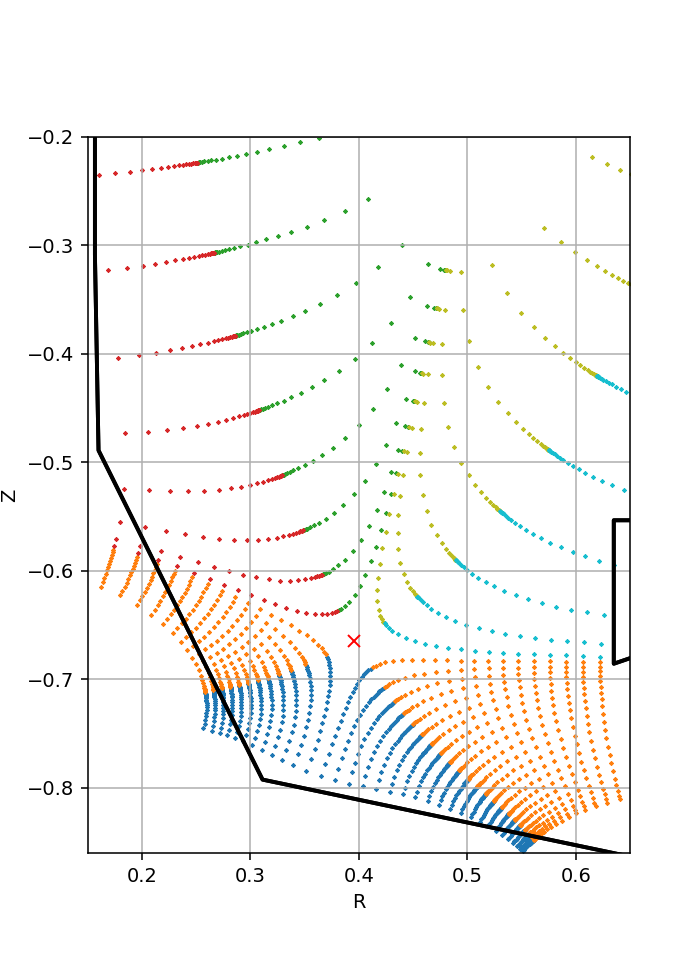

In [14]:

gridname = "g3c3c-radial_fine_xpoint3"
path = os.path.join(onedrive_path, r"Project\collab\tech\grid\ST40\matteo-mod")

path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")

options = Options(path_yaml).yml


# options["psi_core"] = -0.0707
# options["psinorm_sol"] = 1.43



with open(os.path.join(onedrive_path, r"Project\collab\tech\grid\ST40\4-soledge_optimised\ST40_P3_eq_0015_modgeom.geqdsk"), "rt") as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)


mesh = BoutMesh(eq, options)
# mesh.redistributePoints(options)

mesh.calculateRZ()

fig, ax = plt.subplots(figsize = (5,7), dpi = 140)
# eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
eq.plotWall(axis = ax)

ax.grid()
ax.legend('', frameon=False)
ax.set_xlim([0.15, 0.65]); ax.set_ylim([-0.86,-0.2])     # Both lower divertors
# ax.set_xlim([0.20, 0.45]); ax.set_ylim([0.6,0.8])     # Inner upper leg
# ax.set_xlim([0.62, 0.800]); ax.set_ylim([-0.08,0])     # OMP
# ax.set_xlim([0.12, 0.300]); ax.set_ylim([-0.15,0.05])     # IMP

ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)

plt.savefig(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3c2-medfine_xpoint.png", dpi = 150)



try:
    ax.scatter(R, Z, s = 8, c = "black", marker = "o", edgecolor = "k", alpha = 1, linewidths = 0.2)
except:
    print("Couldn't plot b2")
    
mesh.geometry()
mesh.writeGridfile(path_grid)

In [15]:
mesh.close()

AttributeError: 'BoutMesh' object has no attribute 'close'

In [ ]:
if "Rxy_lower_right_corners" in da.coords:
    r_nodes = ["R", "Rxy_lower_left_corners", "Rxy_lower_right_corners", "Rxy_upper_left_corners", "Rxy_upper_right_corners"]
    z_nodes = ["Z", "Zxy_lower_left_corners", "Zxy_lower_right_corners", "Zxy_upper_left_corners", "Zxy_upper_right_corners"] 
    cell_r = np.concatenate([np.expand_dims(da[x], axis = 2) for x in r_nodes], axis = 2)
    cell_z = np.concatenate([np.expand_dims(da[x], axis = 2) for x in z_nodes], axis = 2)
else:
    raise Exception("Cell corners not present in mesh, cannot do polygon plot")

Nx = len(cell_r)
Ny = len(cell_r[0])
edgecolor = "black"
patches = []

# https://matplotlib.org/2.0.2/examples/api/patch_collection.html

idx = [np.array([1, 2, 4, 3, 1])]
patches = []
for i in range(Nx):
    for j in range(Ny):
        p = matplotlib.patches.Polygon(
            np.concatenate((cell_r[i][j][tuple(idx)], cell_z[i][j][tuple(idx)])).reshape(2, 5).T,
            fill=False,
            closed=True,
            facecolor = None,
        )
        patches.append(p)

    
# create colorbar
norm = _create_norm(logscale, norm, vmin, vmax)

if grid_only is True:
    cmap = matplotlib.colors.ListedColormap(["white"])
colors = da.data.flatten()
polys = matplotlib.collections.PatchCollection(
    patches, alpha = 1, norm = norm, cmap = cmap, 
    antialiaseds = antialias,
    edgecolors = linecolor,
    linewidths = linewidth,
    joinstyle = "bevel")




polys.set_array(colors)

if add_colorbar:
    fig.colorbar(polys, ax = cax, label = colorbar_label)
ax.add_collection(polys)     
    
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("R [m]")
ax.set_ylabel("Z [m]")
ax.set_ylim(cell_z.min(), cell_z.max())
ax.set_xlim(cell_r.min(), cell_r.max())
ax.set_title(da.name)

Calculate geometry
Distances inner_lower_divertor(0)
Distances inner_lower_divertor(1)
Calculating contour distances: 33
PsiContour distance [0.005868030562280225, 0.005840756455122201, 0.011873115662588477, 0.016894469797472743, 0.021424586362663523, 0.025526467325533455, 0.029258184157640713, 0.03269175574150041, 0.03584723714276782, 0.038728230372977235, 0.04134447500107078, 0.04371381762758352, 0.04586465738720853, 0.04782172008806052, 0.04960714595580476, 0.05123870138846517, 0.05273180167565669, 0.054103597916212005, 0.05536862482568631, 0.05653972340657967, 0.05762888655758543, 0.0586472813082416, 0.059607581393484474, 0.06052450181559822, 0.06144409673820759]

FineContour distance [0.         0.00040424 0.00080847 0.00121271 0.00161695 0.00202119
 0.00242542 0.00282966 0.0032339  0.00363814 0.00404237 0.00444661
 0.00485085 0.00525509 0.00565932 0.00606356 0.0064678  0.00687204
 0.00727627 0.00768051 0.00808475 0.00848899 0.00889322 0.00929746
 0.0097017  0.01010594 0.01051017 

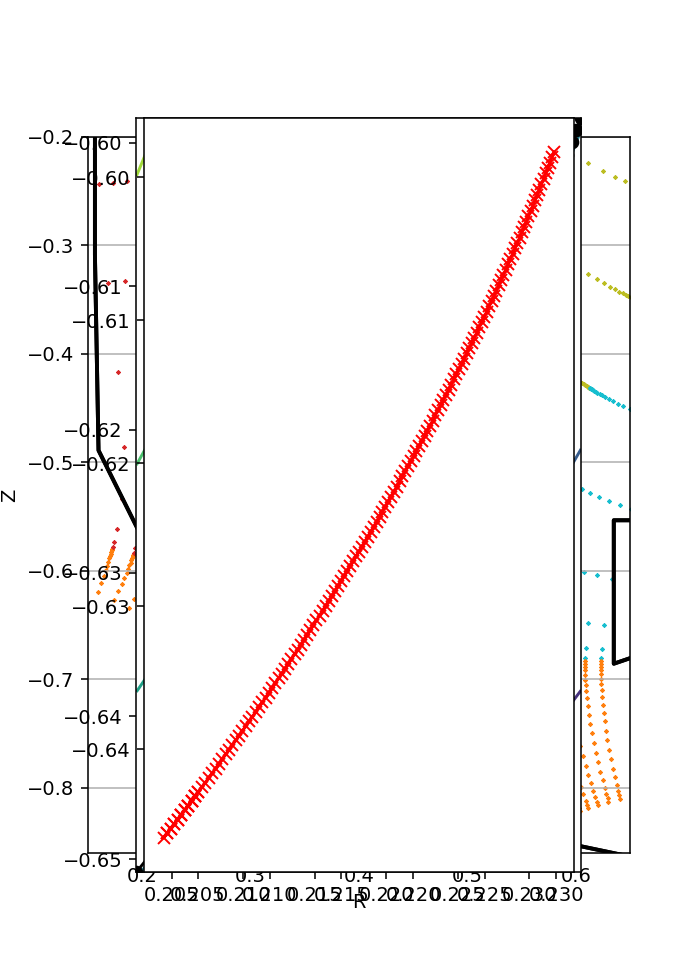

ValueError: Distance not monotonically increasing for this contour. distance=[0.005868030562280225, 0.005840756455122201, 0.011873115662588477, 0.016894469797472743, 0.021424586362663523, 0.025526467325533455, 0.029258184157640713, 0.03269175574150041, 0.03584723714276782, 0.038728230372977235, 0.04134447500107078, 0.04371381762758352, 0.04586465738720853, 0.04782172008806052, 0.04960714595580476, 0.05123870138846517, 0.05273180167565669, 0.054103597916212005, 0.05536862482568631, 0.05653972340657967, 0.05762888655758543, 0.0586472813082416, 0.059607581393484474, 0.06052450181559822, 0.06144409673820759]

In [12]:
mesh.geometry()
mesh.writeGridfile(path_grid)

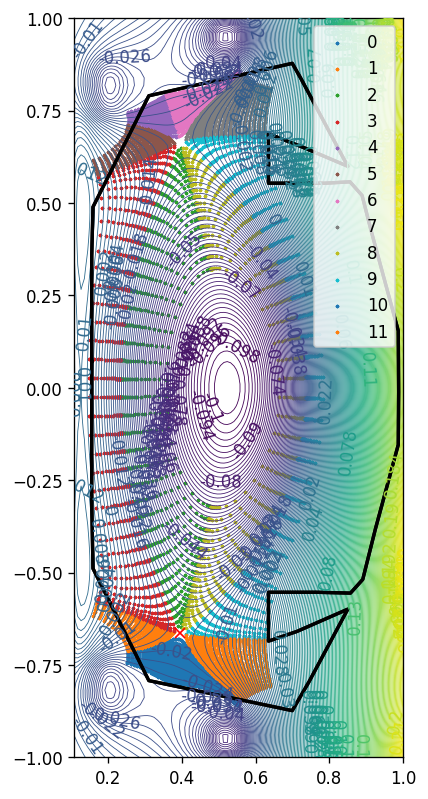

In [ ]:
fig, ax = plt.subplots(figsize = (4,8), dpi = 120)
eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
eq.plotWall(axis = ax)
ax.set_aspect("equal")

In [9]:
from boututils.datafile import DataFile

path = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b1-lores_newhypno.nc"
# path = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a5-fatter.nc"

m = DataFile(path)
# with DataFile(path) as m:
    # print(m.keys())

(104, 38, 5)


C:\Users\mikek\OneDrive\Project\python-packages\gridtools\gridue_to_bout.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.concatenate((r[i][j][idx], z[i][j][idx])).reshape(2, 5).T,


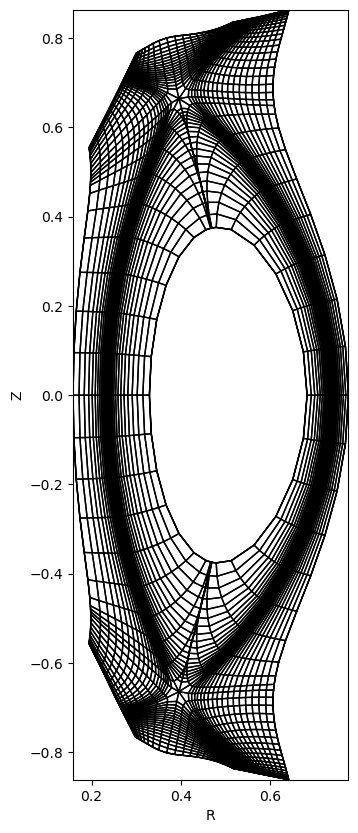

In [72]:
import gridtools.gridue_to_bout
gridue = gridtools.gridue_to_bout.importGridue(r"C:\Users\mikek\OneDrive\Project\python-packages\gridtools\UEDGE_102x36")
r_u, z_u = gridtools.gridue_to_bout.plot(gridue)

## UEDGE point order test

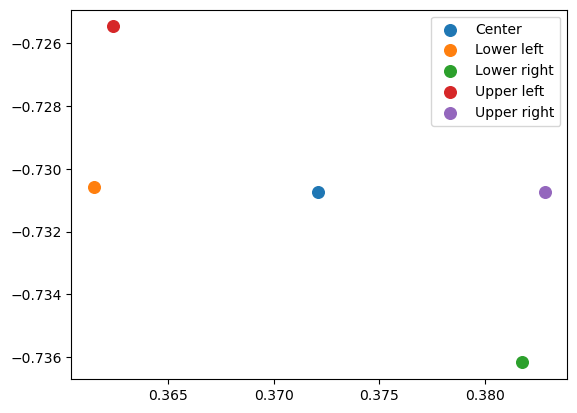

In [71]:
fig, ax = plt.subplots()

s = 70

id = 10
ax.scatter(r_u[id,id,0], z_u[id,id,0], s = s, label = "Center")
ax.scatter(r_u[id,id,1], z_u[id,id,1], s = s, label = "Lower left")
ax.scatter(r_u[id,id,2], z_u[id,id,2], s = s, label = "Lower right")
ax.scatter(r_u[id,id,3], z_u[id,id,3], s = s, label = "Upper left")
ax.scatter(r_u[id,id,4], z_u[id,id,4], s = s, label = "Upper right")

ax.legend()


## Hypnotoad point order test

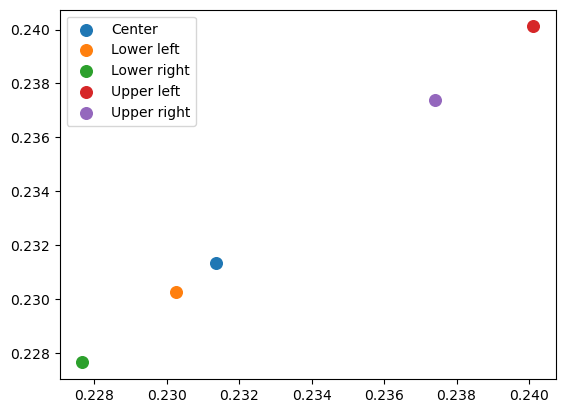

In [114]:
fig, ax = plt.subplots()

s = 70

id = 12
ax.scatter(r[id,id,0], z[id,id,0], s = s, label = "Center")
ax.scatter(r[id,id,1], z[id,id,1], s = s, label = "Lower left")
ax.scatter(r[id,id,2], z[id,id,2], s = s, label = "Lower right")
ax.scatter(r[id,id,3], z[id,id,3], s = s, label = "Upper left")
ax.scatter(r[id,id,4], z[id,id,4], s = s, label = "Upper right")

ax.legend()


PermissionError: [Errno 13] Permission denied: b'C:\\Users\\mikek\\OneDrive\\Project\\collab\\tech\\grid\\ST40\\matteo-mod\\g3b1-lores_newhypno.nc'

In [56]:
%matplotlib inline
# %matplotlib qt

In [8]:
def make_colors(number, cmap):
    """make_colors(number of colours, matplotlib colormap function)"""
    colors = []
    idx = np.linspace(0,255,number)
    
    for i in range(number):
        colors.append(cmap(int(idx[i])))
                    
    return colors
import matplotlib as mpl
make_colors(10, plt.get_cmap("jet"))

[(0.0, 0.0, 0.5, 1.0),
 (0.0, 0.0, 0.999108734402852, 1.0),
 (0.0, 0.3784313725490196, 1.0, 1.0),
 (0.0, 0.8333333333333334, 1.0, 1.0),
 (0.30044275774826057, 1.0, 0.6672991777356103, 1.0),
 (0.6546489563567361, 1.0, 0.31309297912713474, 1.0),
 (1.0, 0.9012345679012348, 0.0, 1.0),
 (1.0, 0.4945533769063183, 0.0, 1.0),
 (1.0, 0.08787218591140178, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0)]

In [5]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 200)
eq.plotPotential(ncontours=40, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
# mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 1,  plot_types = ["poloidal", "radial"], linewidths = 0.1)
mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 5,  plot_types = ["scatter"], linewidths = 1)
eq.plotWall(axis = ax)

ax.grid()
ax.legend('', frameon=False)
ax.set_xlim([0.15, 0.65]); ax.set_ylim([-0.86,-0.5])     # Both lower divertors

ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)

# ax.scatter(mesh.Rxy, mesh.Zxy, s = 5, c = "k", edgecolor = "k", alpha = 1, linewidths = 0.2)
# ax.scatter(b2.x, b2.y, s = 5, c = "magenta", edgecolor = "k", alpha = 1, linewidths = 0.2)

# fig.show()

In [4]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 120)
eq.plotPotential(ncontours=40, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
eq.plotWall(axis = ax)

ax.grid()
ax.legend('', frameon=False)
ax.set_xlim([0.15, 0.65]); ax.set_ylim([-0.86,-0.5])     # Both lower divertors

ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)

fig.show()

ax.scatter(b2.x, b2.y, s = 3, c = "magenta", edgecolor = "k", alpha = 1, linewidths = 0.2)

In [51]:
mesh.x_groups[0]

# Run Mesh piecewise

In [37]:
from hypnotoad.utils.parallel_map import ParallelMap
from hypnotoad.core.mesh import MeshRegion

In [11]:
self = mesh


parallel_map = ParallelMap(
            self.user_options.number_of_processors,
            equilibrium=self.equilibrium,
        )

In [22]:
region_id = self.region_lookup[("outer_upper_divertor", 1)]
region_id

7

In [42]:
eq_region = self.equilibrium.regions['outer_upper_divertor']

i = 0

region_id = self.region_lookup[(eq_region.name, i)]

eq_region_with_boundaries = eq_region.getRegridded(
                    radialIndex=i,
                    psi=self.equilibrium.psi,
                    width=self.user_options.refine_width,
                )

mesh = MeshRegion(
                    self,
                    region_id,
                    eq_region_with_boundaries,
                    self.connections[region_id],
                    i,
                    self.user_options,
                    parallel_map,
                )

[0.         0.00333527 0.00667048 0.01000573]
[0.         0.00333515 0.00667042 0.01000563]
[0.         0.00333519 0.00667034 0.01000561]
[0.         0.00333523 0.00667042 0.01000557]
[0.         0.00333527 0.0066705  0.01000569]
[0.         0.00333531 0.00667058 0.01000581]
[0.         0.00333535 0.00667066 0.01000593]
[0.         0.00333539 0.00667074 0.01000605]
[0.         0.00333527 0.0066705  0.01000569]
[0.         0.00333531 0.00667058 0.01000581]
[0.         0.00333535 0.00667066 0.01000593]
[0.         0.00333539 0.00667074 0.01000605]
[0.         0.00333545 0.00667084 0.01000619]
[0.         0.00333551 0.00667096 0.01000635]
[0.         0.0033356  0.00667112 0.01000656]
[0.         0.00333572 0.00667132 0.01000684]
[0.         0.00333589 0.00667161 0.01000721]
[0.         0.00333613 0.00667201 0.01000774]
[0.         0.00333648 0.00667261 0.01000849]
[-0.14945711 -0.14612063 -0.14278451 -0.13944862 -0.1361129  -0.1327773
 -0.12944178 -0.12610634 -0.12277094 -0.11943559 -0.11

ValueError: Expect x to not have duplicates

In [32]:
print(self.equilibrium.regions['outer_upper_divertor'].nSegments)

2


In [75]:
fig, ax = plt.subplots(figsize = (6,6), dpi = 120)
eq.plotPotential(ncontours=40, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
mesh.plotPoints(xlow=True, ylow=True, corners=True, ax = ax, s = 0.5)
eq.plotWall(axis = ax)

ax.grid()
ax.legend('', frameon=False)
ax.set_xlim([0.2, 0.65])
ax.set_ylim([-1,-0.6])
ax.set_xlabel("R")
ax.set_ylabel("Z")

fig.show()

# Use hypnotoad

In [133]:
self = Options("a1-orthogonal.yml")
self.opts["ny_inner_divertor"] = 8
self.opts["ny_outer_divertor"] = 8
self.opts["ny_inner_sol"] = 24
self.opts["ny_outer_sol"] = 40
self.NXPE = 2
opts.check_nxpe()


NYPE: 21.447721179624665
LocalNx (number of points per core): 15.013404825737265
LocalNy (number of points per core): 5.31525
Number of cores in ny_inner_divertor: 2.2576548610131226
Number of cores in ny_outer_divertor: 2.2576548610131226
Number of cores in ny_inner_sol: 4.515309722026245
Number of cores in ny_outer_sol: 7.901792013545929



In [123]:
opts = read_yaml("a1-orthogonal.yml")

double_null = True
if double_null:
    div_mult = 2
else:
    div_mult = 1

test = dict()

# Domain split (NXPE=2, NYPE=12) into domains (localNx=14, localNy=8)

opts["ny_inner_divertor"] = 12
opts["ny_outer_divertor"] = 12
opts["ny_inner_sol"] = 24
opts["ny_outer_sol"] = 42

NXPE = 1.865
NPES = 40
NYPE = NPES/NXPE

ny = opts["ny_inner_divertor"]*div_mult + opts["ny_outer_divertor"]*div_mult + opts["ny_inner_sol"] + opts["ny_outer_sol"]
nx = opts["nx_core"] + opts["nx_sol"]

localNy = ny/NYPE
localNx = (nx-4)/NXPE

if NPES % NXPE == 0:
    test["NPES"] = True
else:
    test["NPES"] = False

if nx % NXPE == 0:
    test["localNx"] = True
else:
    test["localNx"] = False

if ny % NYPE == 0:
    test["localNy"] = True
else:
    test["localNy"] = False

print(f"NYPE: {NYPE}")
print(f"LocalNx (number of points per core): {localNx}")
print(f"LocalNy (number of points per core): {localNy}")

for x in ["ny_inner_divertor", "ny_outer_divertor", "ny_inner_sol", "ny_outer_sol"]:
    
    if opts[x] % localNy == 0:
        test[x] = True
    else:
        test[x] = False
    print(f"Number of cores in {x}: {opts[x] / localNy}")

print("")
# for name in test.keys():
    # print(f'Success in {name}: {test[name]}')




NYPE: 21.447721179624665
LocalNx (number of points per core): 15.013404825737265
LocalNy (number of points per core): 5.31525
Number of cores in ny_inner_divertor: 2.2576548610131226
Number of cores in ny_outer_divertor: 2.2576548610131226
Number of cores in ny_inner_sol: 4.515309722026245
Number of cores in ny_outer_sol: 7.901792013545929



In [121]:
abs(np.sqrt(NPES * (nx-4) / ny) - NXPE)

1.8655843601224849

Get RZ values


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

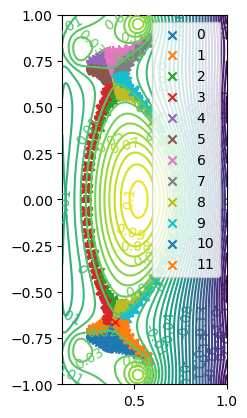

In [260]:
# fig, ax = plt.subplots()
mesh.calculateRZ()

ax = eq.plotPotential(ncontours=40)
ax.plot(*eq.x_points[0], "rx")
mesh.plotPoints(
    xlow=options.get("plot_xlow", True),
    ylow=options.get("plot_ylow", True),
    corners=options.get("plot_corners", True),
    ax=ax,
)


# Plot grid cells

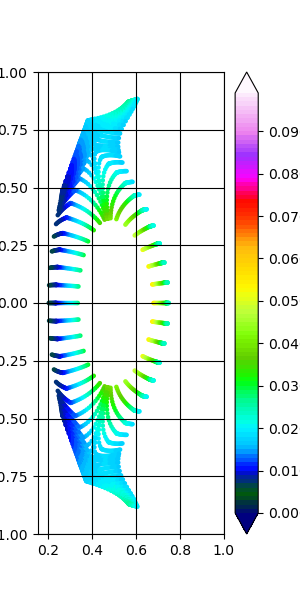

In [101]:
fig, ax = plt.subplots(figsize = (3,6))
import matplotlib as mpl

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = plt.get_cmap("gist_ncar")

color = self.fpsi[:,:,0] / (2*np.pi /self.crx[:,:,0]) 

bounds = np.linspace(0,0.1,100)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plt.scatter(
    self.crx[:,:,0].flatten(),
    self.cry[:,:,0].flatten(), 
    c = color, s = 5,
    cmap = cmap, norm = norm)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
ax.set_xlim(0.15, 1.0)
ax.set_ylim(-1,1)
ax.grid(c = "k", zorder = 0)



cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='vertical')
